# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:green"> Matteucci Massimiliano 932234 </span>
## <span style="color:green"> Esercitazione7 </span>
### <span style="color:green"> Esercizio1 </span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


from numba import njit
from scipy.optimize import curve_fit


@njit
def f(x,a):  # defining the fitting function
    return np.exp(-x/a)

@njit
def auto(y, Tmax=None): #Per calcolare autocorrelazione
    
    if Tmax is None:
        Tmax = int(len(y)/10) 
    
    N = len(y)
    Y = np.zeros(N)
    x = np.linspace(0,N,N)
  
    for i in range(Tmax) :
        s1=0.
        s2=0.
        s3=0.
        s4=0.
        s5=0.
        for j in range(N-i) :
            s1+= y[j]*y[j+i]
            s2+= y[j]
            s3+= y[j+i]
        for k in range(N) :
            s4+= y[k]*y[k]
            s5+= y[k]
        Y[i]=(s1/(N-i)-(s2/(N-i))*(s3/(N-i)))/(s4/N-(s5/N)**2)
    
    return Y

@njit
def Error(y): # Per calcolare incertezze in base all'ampiezza dei blocchi
    M=y.size
    K=np.zeros(4990)
    for L in range(10,5000):
        gs1=0.
        gs2=0.
        N=int(M/L)
        for i in range(N):
            sum=0
            for j in range (i*L,(i+1)*L):
                sum+=y[j]
            mean=sum/L
            mean2=mean**2
            gs1+=mean
            gs2+=mean2
        K[L-10]=((gs2/N-(gs1/N)**2)/(N-1))**0.5
            
    return K






In [10]:
PotS = np.loadtxt("Esercizio7.1//PotInstSolid.out", usecols=(0), delimiter=' ', unpack='true')
PreS = np.loadtxt("Esercizio7.1//PresInstSolid.out", usecols=(0), delimiter=' ', unpack='true')

In [9]:
PotL = np.loadtxt("Esercizio7.1//PotInstLiquid.out", usecols=(0), delimiter=' ', unpack='true')
PreL = np.loadtxt("Esercizio7.1//PresInstLiquid.out", usecols=(0), delimiter=' ', unpack='true')

In [8]:
PotG = np.loadtxt("Esercizio7.1//PotInstGas.out", usecols=(0), delimiter=' ', unpack='true')
PreG = np.loadtxt("Esercizio7.1//PresInstGas.out", usecols=(0), delimiter=' ', unpack='true')

In [4]:
APotS=auto(PotS,500)
APreS=auto(PreS,500)

In [5]:
APotL=auto(PotL,500)
APreL=auto(PreL,500)

In [6]:
APotG=auto(PotG,500)
APreG=auto(PreG,500)

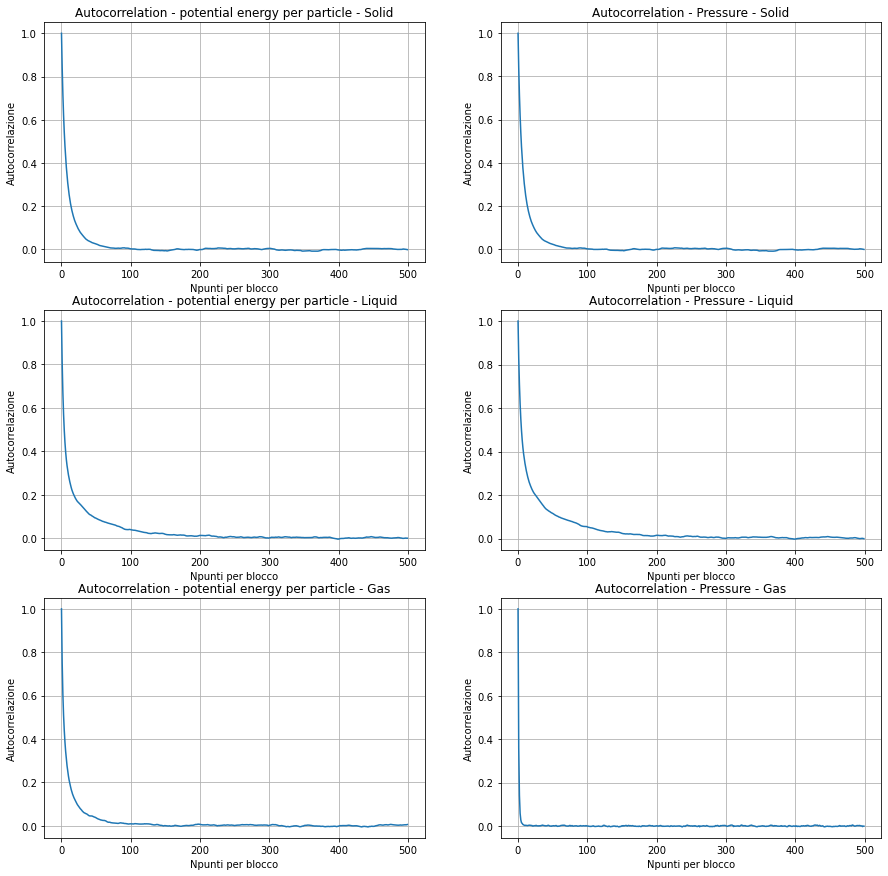

In [7]:
fig= plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.plot(APotS[:500])
plt.title('Autocorrelation - potential energy per particle - Solid')
plt.xlabel('Npunti per blocco')
plt.ylabel('Autocorrelazione')
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(APreS[:500])
plt.title('Autocorrelation - Pressure - Solid')
plt.xlabel('Npunti per blocco')
plt.ylabel('Autocorrelazione')
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(APotL[:500])
plt.title('Autocorrelation - potential energy per particle - Liquid')
plt.xlabel('Npunti per blocco')
plt.ylabel('Autocorrelazione')
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(APreL[:500])
plt.title('Autocorrelation - Pressure - Liquid')
plt.xlabel('Npunti per blocco')
plt.ylabel('Autocorrelazione')
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(APotG[:500])
plt.title('Autocorrelation - potential energy per particle - Gas')
plt.xlabel('Npunti per blocco')
plt.ylabel('Autocorrelazione')
plt.grid(True)

plt.subplot(3,2,6)
plt.plot(APreG[:500])
plt.title('Autocorrelation - Pressure - Gas')
plt.xlabel('Npunti per blocco')
plt.ylabel('Autocorrelazione')
plt.grid(True)
plt.show()

In [11]:
IPotS=Error(PotS)
IPreS=Error(PreS)

In [12]:
IPotL=Error(PotL)
IPreL=Error(PreL)

In [13]:
IPotG=Error(PotG)
IPreG=Error(PreG)

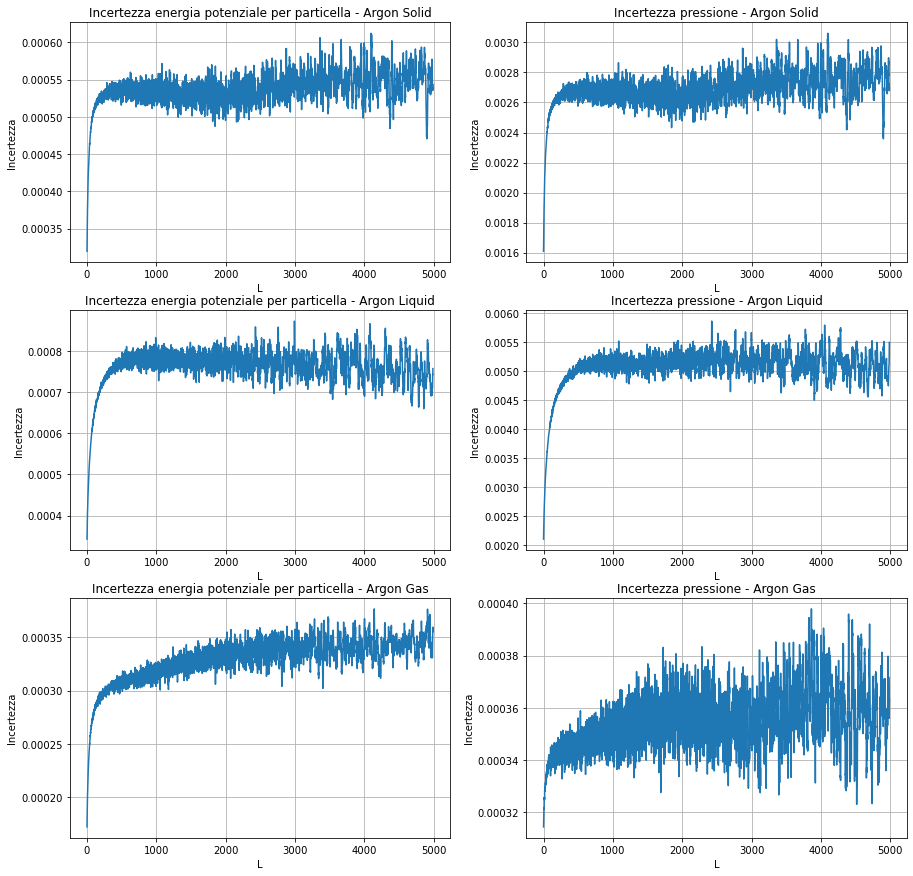

In [14]:
fig= plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
plt.plot(IPotS)
plt.title('Incertezza energia potenziale per particella - Argon Solid')
plt.xlabel('L')
plt.ylabel('Incertezza')
plt.grid(True)

plt.subplot(3,2,2)
plt.plot(IPreS)
plt.title('Incertezza pressione - Argon Solid')
plt.xlabel('L')
plt.ylabel('Incertezza')
plt.grid(True)

plt.subplot(3,2,3)
plt.plot(IPotL)
plt.title('Incertezza energia potenziale per particella - Argon Liquid')
plt.xlabel('L')
plt.ylabel('Incertezza')
plt.grid(True)

plt.subplot(3,2,4)
plt.plot(IPreL)
plt.title('Incertezza pressione - Argon Liquid')
plt.xlabel('L')
plt.ylabel('Incertezza')
plt.grid(True)

plt.subplot(3,2,5)
plt.plot(IPotG)
plt.title('Incertezza energia potenziale per particella - Argon Gas')
plt.xlabel('L')
plt.ylabel('Incertezza')
plt.grid(True)

plt.subplot(3,2,6)
plt.plot(IPreG)
plt.title('Incertezza pressione - Argon Gas')
plt.xlabel('L')
plt.ylabel('Incertezza')
plt.grid(True)

plt.show()

Osserviamo che una volta raggiunta la dimensione dei blocchi per cui l'autocorrelazione tende a zero l'incertezza inizia ad oscillare con ampiezze maggiori rimanendo in media circa costante.
Dal punto di vista del metodo della media a blocchi questo vuol dire che se prendiamo blocchi troppo piccoli sottostimiamo l'incertezza statistica sulla misura.

### <span style="color:green"> Esercizio4 </span>

In [81]:
#V=V* * eps     eps=120K * Kb
y = 120*1.380649*pow(10,-23)*np.loadtxt("Esercizio7.2//ArgonSolid//ave_epotSolid.out", usecols=(2), delimiter=' ', unpack='true')
y_err = 120*1.380649*pow(10,-23)*np.loadtxt("Esercizio7.2///ArgonSolid//ave_epotSolid.out", usecols=(3), delimiter=' ', unpack='true')
x=np.arange(y.size)
#P=P* * eps/sigma^3   sigma=0.34 nm
y1 = 120*1.380649*pow(10,4)/pow(0.34,3)*np.loadtxt("Esercizio7.2///ArgonSolid//ave_presSolid.out", usecols=(2), delimiter=' ', unpack='true')
y1_err = 120*1.380649*pow(10,4)/pow(0.34,3)*np.loadtxt("Esercizio7.2///ArgonSolid//ave_presSolid.out", usecols=(3), delimiter=' ', unpack='true')

x2 = np.loadtxt("Esercizio7.2//ArgonSolid//gaveSolid.out", usecols=(1), delimiter=' ', unpack='true')
y2 = np.loadtxt("Esercizio7.2//ArgonSolid//gaveSolid.out", usecols=(2), delimiter=' ', unpack='true')
y2_err = np.loadtxt("Esercizio7.2//ArgonSolid//gaveSolid.out", usecols=(3), delimiter=' ', unpack='true')

x3 = np.loadtxt("Esercizio7.3//ArgonSolid//gaveSolid.out", usecols=(1), delimiter=' ', unpack='true')
y3 = np.loadtxt("Esercizio7.3//ArgonSolid//gaveSolid.out", usecols=(2), delimiter=' ', unpack='true')/500.
y3_err = np.loadtxt("Esercizio7.3//ArgonSolid//gaveSolid.out", usecols=(3), delimiter=' ', unpack='true')/500.

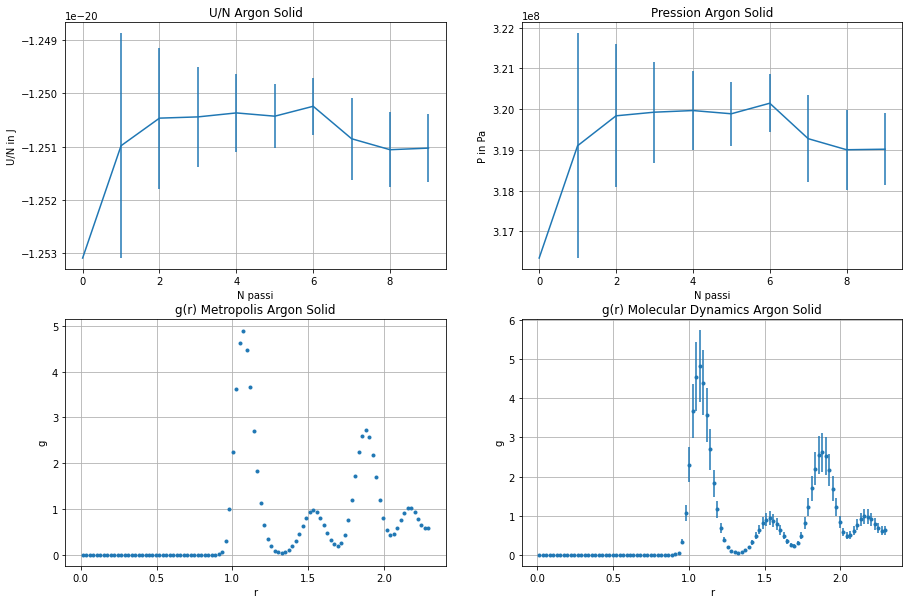

In [83]:
fig= plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.errorbar(x,y,y_err)
plt.title('U/N Argon Solid')
plt.xlabel('N blocchi')
plt.ylabel('U/N in J')
plt.grid(True)


plt.subplot(2,2,2)
plt.errorbar(x,y1,y1_err)
plt.title('Pression Argon Solid')
plt.xlabel('N blocchi')
plt.ylabel('P in Pa')
plt.grid(True)

plt.subplot(2,2,3)
plt.errorbar(x2,y2,y2_err,fmt=".")
plt.title('g(r) Metropolis Argon Solid')
plt.xlabel('r')
plt.ylabel('g')
plt.grid(True)

plt.subplot(2,2,4)
plt.errorbar(x3,y3,y3_err,fmt=".")
plt.title('g(r) Molecular Dynamics Argon Solid')
plt.xlabel('r')
plt.ylabel('g')
plt.grid(True)

plt.show()

Una volta riscalata la densità trovata con il molecular dynamics è chiaro che i due grafici sono sovrapponibili, con quello del metropolis più preciso.

In [84]:
y = 120*1.380649*pow(10,-23)*np.loadtxt("Esercizio7.2//ArgonLiquid//ave_epotLiquid.out", usecols=(2), delimiter=' ', unpack='true')
y_err = 120*1.380649*pow(10,-23)*np.loadtxt("Esercizio7.2///ArgonLiquid//ave_epotLiquid.out", usecols=(3), delimiter=' ', unpack='true')
x=np.arange(y.size)

y1 = 120*1.380649*pow(10,4)/pow(0.34,3)*np.loadtxt("Esercizio7.2///ArgonLiquid//ave_presLiquid.out", usecols=(2), delimiter=' ', unpack='true')
y1_err = 120*1.380649*pow(10,4)/pow(0.34,3)*np.loadtxt("Esercizio7.2///ArgonLiquid//ave_presLiquid.out", usecols=(3), delimiter=' ', unpack='true')

x2 = np.loadtxt("Esercizio7.2//ArgonLiquid//gaveLiquid.out", usecols=(1), delimiter=' ', unpack='true')
y2 = np.loadtxt("Esercizio7.2//ArgonLiquid//gaveLiquid.out", usecols=(2), delimiter=' ', unpack='true')
y2_err = np.loadtxt("Esercizio7.2//ArgonLiquid//gaveLiquid.out", usecols=(3), delimiter=' ', unpack='true')

x3 = np.loadtxt("Esercizio7.3//ArgonLiquid//gaveLiquid.out", usecols=(1), delimiter=' ', unpack='true')
y3 = np.loadtxt("Esercizio7.3//ArgonLiquid//gaveLiquid.out", usecols=(2), delimiter=' ', unpack='true')/500.
y3_err = np.loadtxt("Esercizio7.3//ArgonLiquid//gaveLiquid.out", usecols=(3), delimiter=' ', unpack='true')/500.

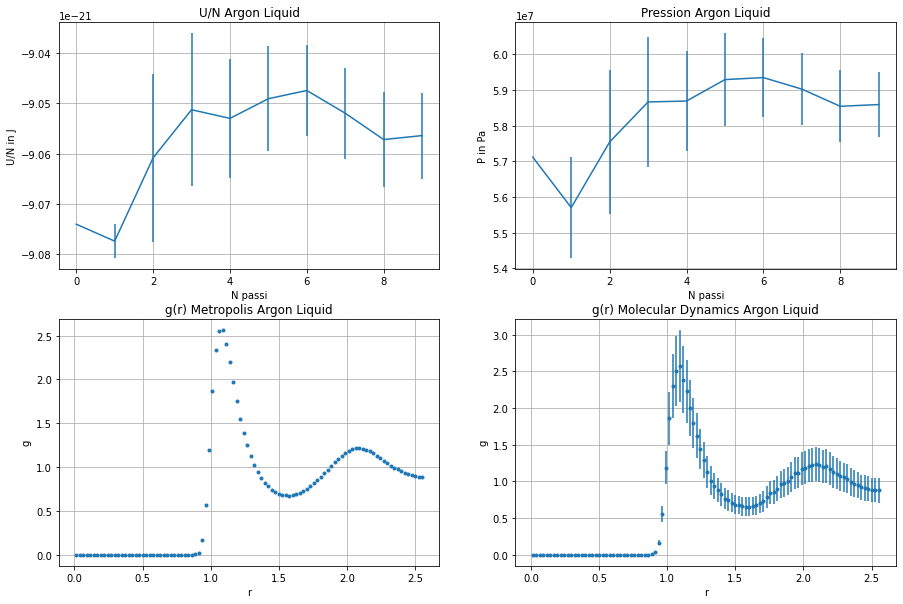

In [86]:
fig= plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.errorbar(x,y,y_err)
plt.title('U/N Argon Liquid')
plt.xlabel('N blocchi')
plt.ylabel('U/N in J')
plt.grid(True)


plt.subplot(2,2,2)
plt.errorbar(x,y1,y1_err)
plt.title('Pression Argon Liquid')
plt.xlabel('N blocchi')
plt.ylabel('P in Pa')
plt.grid(True)

plt.subplot(2,2,3)
plt.errorbar(x2,y2,y2_err,fmt=".")
plt.title('g(r) Metropolis Argon Liquid')
plt.xlabel('r')
plt.ylabel('g')
plt.grid(True)

plt.subplot(2,2,4)
plt.errorbar(x3,y3,y3_err,fmt=".")
plt.title('g(r) Molecular Dynamics Argon Liquid')
plt.xlabel('r')
plt.ylabel('g')
plt.grid(True)

plt.show()

In [15]:
y = 120*1.380649*pow(10,-23)*np.loadtxt("Esercizio7.2//ArgonGas//ave_epotGas.out", usecols=(2), delimiter=' ', unpack='true')
y_err = 120*1.380649*pow(10,-23)*np.loadtxt("Esercizio7.2///ArgonGas//ave_epotGas.out", usecols=(3), delimiter=' ', unpack='true')
x=np.arange(y.size)

y1 = 120*1.380649*pow(10,4)/pow(0.34,3)*np.loadtxt("Esercizio7.2///ArgonGas//ave_presGas.out", usecols=(2), delimiter=' ', unpack='true')
y1_err = 120*1.380649*pow(10,4)/pow(0.34,3)*np.loadtxt("Esercizio7.2///ArgonGas//ave_presGas.out", usecols=(3), delimiter=' ', unpack='true')

x2 = np.loadtxt("Esercizio7.2//ArgonGas//gaveGas.out", usecols=(1), delimiter=' ', unpack='true')
y2 = np.loadtxt("Esercizio7.2//ArgonGas//gaveGas.out", usecols=(2), delimiter=' ', unpack='true')
y2_err = np.loadtxt("Esercizio7.2//ArgonGas//gaveGas.out", usecols=(3), delimiter=' ', unpack='true')

x3 = np.loadtxt("Esercizio7.3//ArgonGas//gaveGas.out", usecols=(1), delimiter=' ', unpack='true')
y3 = np.loadtxt("Esercizio7.3//ArgonGas//gaveGas.out", usecols=(2), delimiter=' ', unpack='true')/500.
y3_err = np.loadtxt("Esercizio7.3//ArgonGas//gaveGas.out", usecols=(3), delimiter=' ', unpack='true')/500.

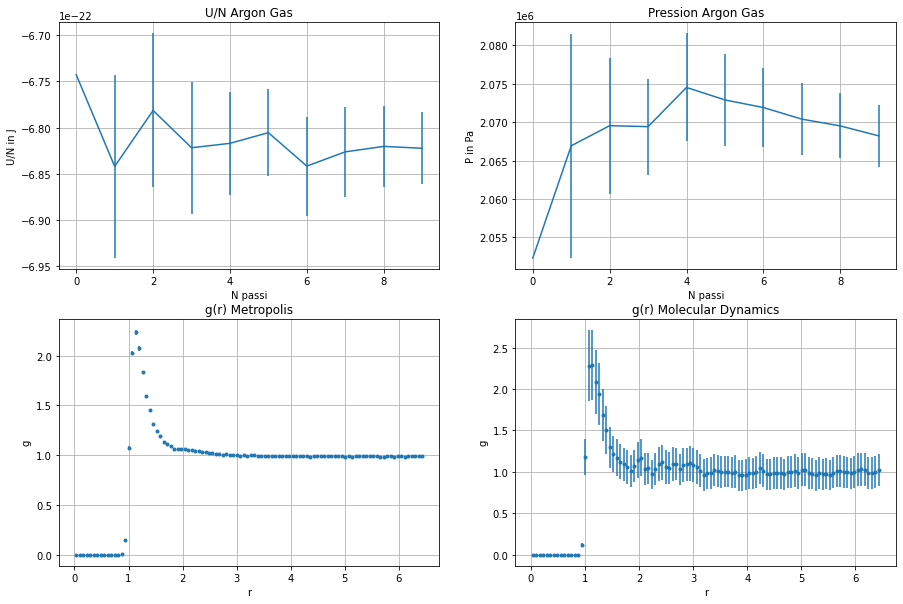

In [16]:
fig= plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.errorbar(x,y,y_err)
plt.title('U/N Argon Gas')
plt.xlabel('N blocchi')
plt.ylabel('U/N in J')
plt.grid(True)


plt.subplot(2,2,2)
plt.errorbar(x,y1,y1_err)
plt.title('Pression Argon Gas')
plt.xlabel('N blocchi')
plt.ylabel('P in Pa')
plt.grid(True)

plt.subplot(2,2,3)
plt.errorbar(x2,y2,y2_err,fmt=".")
plt.title('g(r) Metropolis')
plt.xlabel('r')
plt.ylabel('g')
plt.grid(True)

plt.subplot(2,2,4)
plt.errorbar(x3,y3,y3_err,fmt=".")
plt.title('g(r) Molecular Dynamics')
plt.xlabel('r')
plt.ylabel('g')
plt.grid(True)

plt.show()